# Problem Statement 4.1

In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# train test split
from sklearn.model_selection import train_test_split
# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('D:/DS/aspiration.ai/ASHOKA.csv')

In [3]:
pandas_profiling.ProfileReport(df)

Number of variables,15
Number of observations,494
Total Missing (%),0.0%
Total size in memory,58.0 KiB
Average record size in memory,120.2 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,10


For Bollinger Bands:

* 1. The 14 day rolling mean of the closing price (we call it the average) 
* 2. Upper band which is the rolling mean + 2 standard deviations away from the average. 
* 3. Lower band which is the rolling mean - 2 standard deviations away from the average. 
* 4. Average Daily stock price.

In [4]:
x = df['Close Price'].rolling(14).mean()

In [5]:
df_std = df['Close Price'].std()

In [6]:
y1 = x + 2*df_std

In [7]:
y2 = x - 2*df_std

In [8]:
z = np.array(df['Average Price'])

In [9]:
x.shape

(494,)

In [10]:
y1.shape

(494,)

In [11]:
y2.shape

(494,)

In [12]:
z.shape

(494,)

In [13]:
df['x'] = x
df['y1'] = y1
df['y2'] = y2
df['z'] = z

In [14]:
df.sample(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,x,y1,y2,z
2,ASHOKA,EQ,17-May-2017,214.90,214.30,218.70,212.10,216.55,217.00,215.97,383131,82743402.10,3297,261939,68.37,NaN,NaN,NaN,215.97
485,ASHOKA,EQ,30-Apr-2019,127.60,126.15,127.45,123.50,123.80,124.20,125.42,74493,9343003.80,2014,37803,50.75,129.503571,233.294877,25.712266,125.42
63,ASHOKA,EQ,11-Aug-2017,178.00,175.00,178.65,171.60,175.25,176.40,175.80,286391,50346326.65,1116,253482,88.51,182.096429,285.887734,78.305123,175.80
185,ASHOKA,EQ,07-Feb-2018,212.15,216.70,232.00,215.40,225.35,225.45,223.69,185083,41400438.25,3556,56350,30.45,227.396429,331.187734,123.605123,223.69
411,ASHOKA,EQ,09-Jan-2019,135.25,136.50,136.95,132.05,134.15,134.25,134.33,120832,16231130.25,2376,50349,41.67,126.660714,230.452019,22.869409,134.33


Dropping unnecessary features vectors.

In [15]:
df = df.drop(['Series', 'Symbol', 'Turnover', 'No. of Trades', 'Deliverable Qty', '% Dly Qt to Traded Qty'], axis = 1)

In [16]:
df.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,x,y1,y2,z
0,15-May-2017,210.35,211.0,217.5,206.15,216.30,216.05,212.63,159997,NaN,NaN,NaN,212.63
1,16-May-2017,216.05,212.3,216.0,211.00,214.00,214.90,213.24,213214,NaN,NaN,NaN,213.24
2,17-May-2017,214.90,214.3,218.7,212.10,216.55,217.00,215.97,383131,NaN,NaN,NaN,215.97
3,18-May-2017,217.00,216.0,216.6,208.00,210.00,209.65,211.74,78709,NaN,NaN,NaN,211.74
4,19-May-2017,209.65,212.1,213.9,205.05,206.05,206.25,209.95,398725,NaN,NaN,NaN,209.95


In [17]:
df['x'] = df['x'].fillna((df['x'].mean()))
df['y1'] = df['y1'].fillna((df['y1'].mean()))
df['y2'] = df['y2'].fillna((df['y2'].mean()))

In [18]:
def label_call(df):
   if (df['z'] < df['y2']):
      return 'Buy'
   if (df['z'] > df['y2'] and df['z'] < df['x']):
      return 'Hold Buy/ Liquidate Short'
   if (df['z'] < df['y1'] and df['z'] > df['x']):
      return 'Hold Short/ Liquidate Buy'
   if (df['z'] > df['y1']):
      return 'Short'
   return 'NA'

In [19]:
df['Call'] = df.apply(label_call, axis=1)

In [20]:
df.sample(5)

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,x,y1,y2,z,Call
246,10-May-2018,272.75,278.0,281.75,271.0,272.00,272.30,274.99,186655,275.903571,379.694877,172.112266,274.99,Hold Buy/ Liquidate Short
377,20-Nov-2018,127.10,127.0,127.00,124.7,125.00,125.10,125.20,135504,123.289286,227.080591,19.497981,125.20,Hold Short/ Liquidate Buy
399,21-Dec-2018,130.85,131.7,131.75,125.0,125.10,125.95,128.10,116232,127.557143,231.348448,23.765838,128.10,Hold Short/ Liquidate Buy
270,13-Jun-2018,237.40,236.4,246.85,235.2,243.00,243.40,240.92,63526,243.375000,347.166305,139.583695,240.92,Hold Buy/ Liquidate Short
311,09-Aug-2018,145.85,145.0,149.95,143.8,145.45,144.40,146.03,72569,147.132143,250.923448,43.340838,146.03,Hold Buy/ Liquidate Short


In [21]:
df['Call'].dtype

dtype('O')

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 
df['Call'] = le.fit_transform(np.asarray(df['Call']))
df['Call'].unique()

array([1, 0], dtype=int64)

In [23]:
df.isnull().any()

Date                     False
Prev Close               False
Open Price               False
High Price               False
Low Price                False
Last Price               False
Close Price              False
Average Price            False
Total Traded Quantity    False
x                        False
y1                       False
y2                       False
z                        False
Call                     False
dtype: bool

Here; x, y1, y2 are the 3 Bollinger Bands.

z is the Average Stock Price.

In [24]:
X = df[['x', 'y1', 'y2', 'z']].copy()
y = df[['Call']].copy()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

6 Classification methods will be implemented on the given dataset.

* Logistic Regression
* Naive Bayes
* Stochastic Gradient Descent
* K- Nearest Neighbors
* Decision Tree
* Support Vector Machine

#### Logistic Regression

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
logreg.score(X_test, y_test)

1.0

In [28]:
cm = confusion_matrix(y_test, y_pred_log)
print(cm)

[[72  0]
 [ 0 77]]


In [29]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        77

   micro avg       1.00      1.00      1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



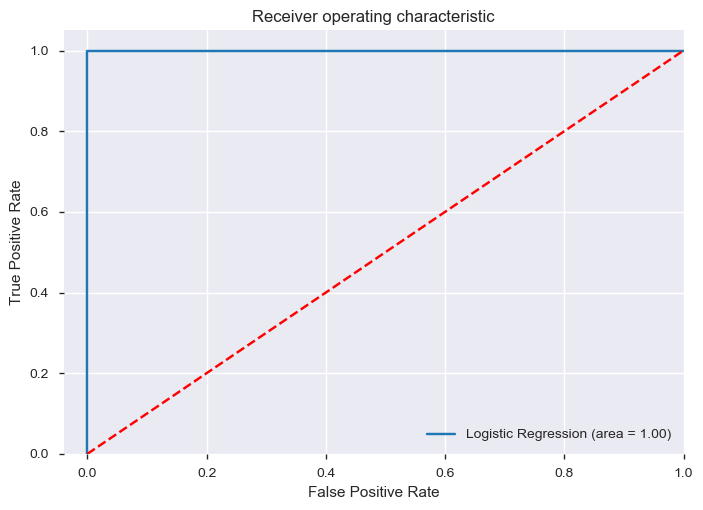

In [62]:
logit_roc_auc = roc_auc_score(y_test, y_pred_log)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Naive Bayes

In [31]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
nb.score(X_test, y_test)

0.6644295302013423

In [33]:
confusion_matrix = confusion_matrix(y_test, y_pred_nb)
confusion_matrix

array([[64,  8],
       [42, 35]], dtype=int64)

In [34]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.60      0.89      0.72        72
           1       0.81      0.45      0.58        77

   micro avg       0.66      0.66      0.66       149
   macro avg       0.71      0.67      0.65       149
weighted avg       0.71      0.66      0.65       149



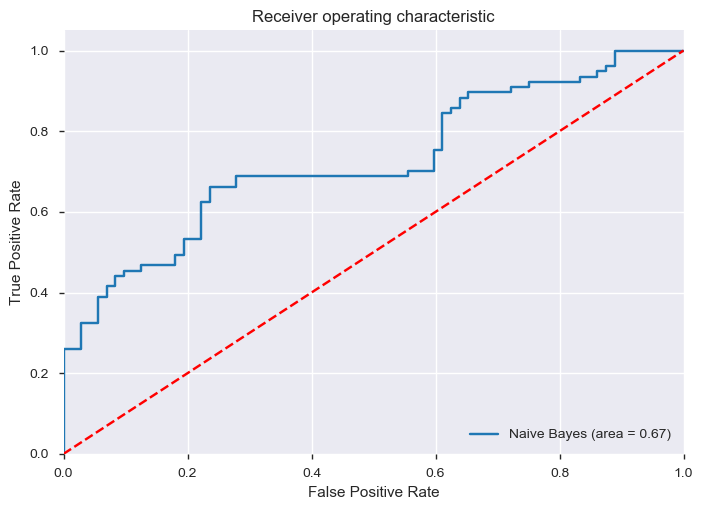

In [61]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Stochastic Gradient Descent

In [36]:
sgd = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state = 101)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
sgd.score(X_test, y_test)

0.5637583892617449

In [40]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        72
           1       0.54      1.00      0.70        77

   micro avg       0.56      0.56      0.56       149
   macro avg       0.77      0.55      0.44       149
weighted avg       0.76      0.56      0.45       149



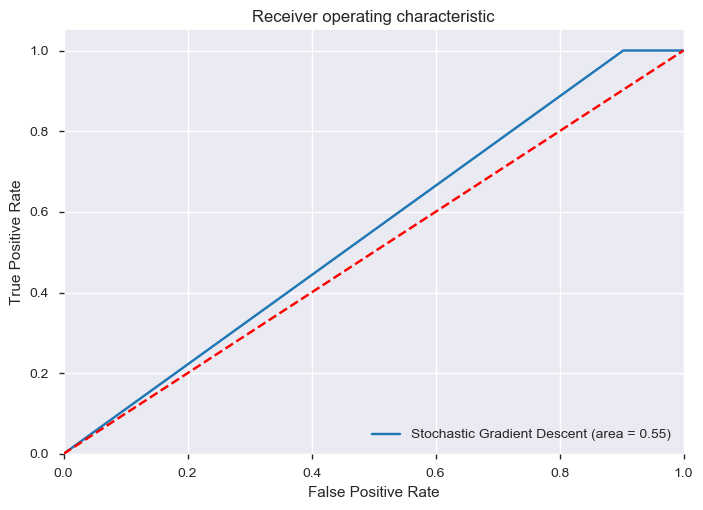

In [60]:
sgd_roc_auc = roc_auc_score(y_test, y_pred_sgd)
fpr, tpr, thresholds = roc_curve(y_test, sgd.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Stochastic Gradient Descent (area = %0.2f)' % sgd_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### KNN

In [42]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [43]:
knn.score(X_test, y_test)

0.9328859060402684

In [46]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        72
           1       0.91      0.96      0.94        77

   micro avg       0.93      0.93      0.93       149
   macro avg       0.93      0.93      0.93       149
weighted avg       0.93      0.93      0.93       149



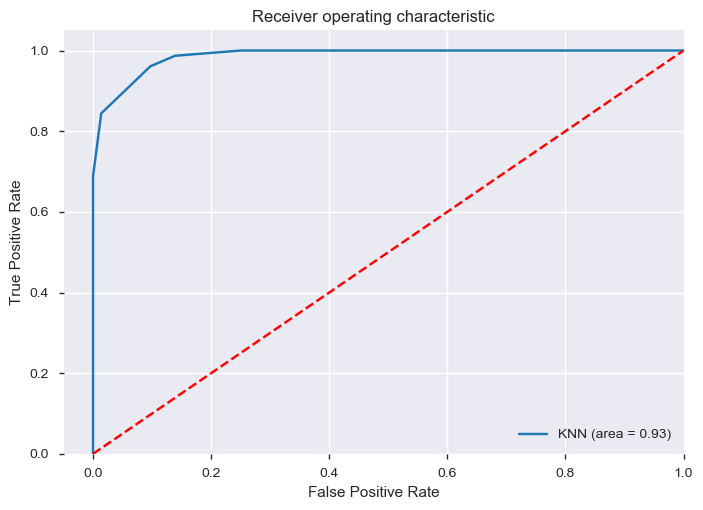

In [59]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree

In [53]:
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 10, max_features = None, min_samples_leaf = 15)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

In [54]:
dtree.score(X_test, y_test)

0.7651006711409396

In [55]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        72
           1       0.78      0.75      0.77        77

   micro avg       0.77      0.77      0.77       149
   macro avg       0.77      0.77      0.77       149
weighted avg       0.77      0.77      0.77       149



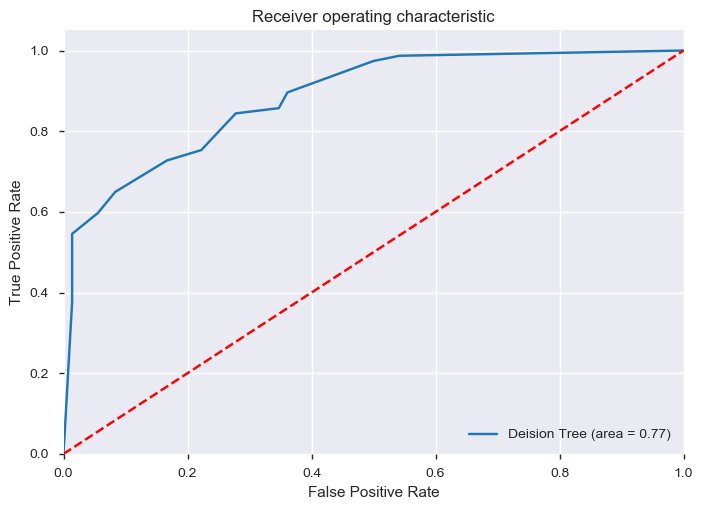

In [58]:
dtree_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Support Vector Machine

In [69]:
svm = SVC(kernel = 'linear', C = 0.025, random_state = 100, probability = True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
svm.score(X_test, y_test)

1.0

In [71]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        77

   micro avg       1.00      1.00      1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



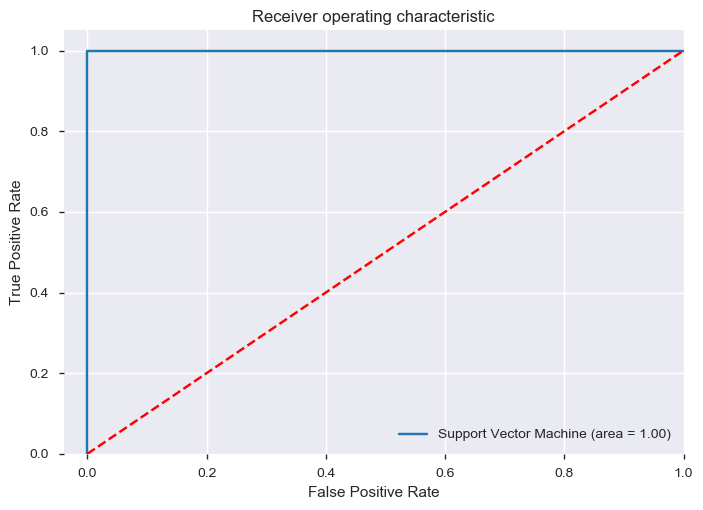

In [73]:
svm_roc_auc = roc_auc_score(y_test, y_pred_svm)
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.04, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Performance of the classifiers:

LogisticRegression = SVM > KNN > Decision Tree > Naive Bayes > Stochastic Gradient Descent